### 透视表与热力图

如果想查看论坛用户在各个地区的行业分布情况，或者说在不同行业的地区分布情况，就需要用到透视表

开头的代码都是差不多的

In [1]:
from model import Users, Provs, Industry

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
u = (Users.select(Users.id, Provs.prov, Industry.industry)
     .join(Provs, on=(Users.prov==Provs.id))
     .join(Industry, on=(Users.industry==Industry.id)))

df = pd.DataFrame(list(u.dicts()))
df = df.drop(df.index[df['prov']=='350000'])

In [3]:
df.head()

,id,industry,prov
0,50,销售,广东省
1,113,金融/银行/保险/证券/投资,上海市
2,151,金融/银行/保险/证券/投资,北京市
3,191,计算机软、硬件/互联网/IT,北京市
4,200,普通劳动力/家政服务,台湾


这里`groupby`完成后直接用了`count()`来计算数量（之前用的是`size()`，两者其实有很大差别，不再赘述）

In [4]:
gdf = df.groupby(['prov', 'industry']).count().rename({'id': 'x'}, axis=1)#.sort_values('x', ascending=False)
gdf.head()

x
prov industry            
上海市  交通/仓储/物流         140
     人力资源              94
     公务员               70
     其他              1227
     兼职/临时/培训生/储备干部    13

下面调用`pivot_table`后就能生成透视表了，最主要参数有4个：`index`，`columns`，`values`，`aggfunc`，这里就不做解释了，因为解释起来太复杂，我这智商只能看懂，不足以说清楚-_-|||

In [5]:
locind = pd.pivot_table(gdf, index=['prov'], columns=['industry'], values=['x'], aggfunc=np.mean)
locind.T

prov                 上海市    云南省  内蒙古自治区     北京市    台湾   吉林省    四川省    天津市  \
  industry                                                                  
x 交通/仓储/物流         140.0    9.0    20.0    91.0   NaN   5.0   39.0   16.0   
  人力资源              94.0    6.0     8.0   126.0   1.0   8.0   35.0    9.0   
  公务员               70.0   21.0    10.0    96.0   3.0   4.0   43.0   13.0   
  其他              1227.0   87.0    32.0  1057.0  18.0  57.0  472.0  118.0   
  兼职/临时/培训生/储备干部    13.0    2.0     1.0    12.0   1.0   2.0    6.0    2.0   
  农/林/牧/渔业          21.0    6.0     4.0    21.0   1.0   2.0   19.0    2.0   
  化工                70.0    9.0     1.0    44.0   NaN   2.0   11.0    8.0   
  医疗/护理/保健/美容       60.0    9.0     2.0    54.0   1.0   1.0   26.0   12.0   
  咨询/顾问            143.0    5.0     5.0    99.0   NaN   4.0   29.0    8.0   
  商务/采购/贸易         214.0    7.0     2.0   142.0   1.0   5.0   40.0   20.0   
  在校学生             251.0   12.0     4.0   250.0   NaN  14.0   74.0   25.0   
  学术/科研            108.0    5.0     2.0   162.0   1.0   4.0   25.0   10.0   
  客户服务/技术支持         75.0    5.0     2.0    71.0   NaN   4.0   18.0    6.0   
  工程机械             206.0    5.0     7.0   162.0   1.0  20.0   57.0   23.0   
  市场/市场拓展/公关       231.0    7.0     5.0   275.0   NaN   7.0   51.0   10.0   
  建筑/房地产/装修/物业     303.0   27.0    21.0   220.0   1.0  17.0  117.0   16.0   
  技工               136.0   18.0    21.0   169.0   3.0  28.0   66.0   17.0   
  教育/培训            153.0   19.0    10.0   135.0   1.0  15.0   85.0   22.0   
  普通劳动力/家政服务        54.0   12.0    21.0    69.0   2.0   9.0   26.0    3.0   
  法律                97.0    9.0     2.0   104.0   2.0   1.0   29.0   17.0   
  环境科学/环保           27.0    2.0     1.0    23.0   NaN   NaN    6.0    4.0   
  生产/加工/制造         200.0   11.0    10.0    74.0   NaN  17.0   55.0   26.0   
  生物/制药/医疗器械        55.0    3.0     1.0    36.0   NaN   1.0   13.0    6.0   
  电子/半导体/仪表仪器      267.0    1.0     2.0   158.0   1.0   4.0   42.0    7.0   
  编辑/文案/传媒/影视/新闻    50.0    3.0     1.0    79.0   NaN   1.0   19.0    5.0   
  美术/设计/创意          47.0    5.0     3.0    36.0   NaN   1.0   19.0    5.0   
  翻译（口译与笔译）          4.0    NaN     2.0     8.0   1.0   1.0    3.0    NaN   
  能源/矿产/地质勘查        43.0   18.0    12.0   110.0   NaN   5.0   62.0   19.0   
  行政/后勤            120.0   19.0    10.0   147.0   1.0   4.0   77.0   12.0   
  计算机软、硬件/互联网/IT  1584.0   33.0    14.0  2217.0   4.0  24.0  312.0   85.0   
  财会/审计/统计         363.0   21.0    24.0   348.0   1.0  23.0  143.0   41.0   
  质控/安检             35.0    7.0     2.0    24.0   NaN   4.0   11.0    1.0   
  通信技术             235.0   17.0    11.0   303.0   2.0   6.0   89.0   13.0   
  酒店/餐饮/旅游/娱乐       19.0    3.0     NaN    18.0   1.0   3.0   14.0    6.0   
  金融/银行/保险/证券/投资  3897.0  124.0    66.0  3207.0  15.0  66.0  701.0  190.0   
  销售               502.0   33.0     8.0   531.0   5.0  26.0  169.0   28.0   
  零售业               34.0    8.0     5.0    20.0   NaN   4.0   30.0    4.0   
  高级管理             279.0   20.0     8.0   376.0   1.0   7.0  105.0   33.0   

prov              宁夏回族自治区    安徽省  ...    甘肃省    福建省  西藏自治区   贵州省    辽宁省  \
  industry                        ...                                     
x 交通/仓储/物流            5.0   17.0  ...    4.0   39.0    NaN   5.0   29.0   
  人力资源                NaN   21.0  ...    3.0   30.0    NaN   6.0   14.0   
  公务员                 4.0   24.0  ...    4.0   41.0    1.0   9.0   23.0   
  其他                 12.0  187.0  ...   24.0  331.0    4.0  39.0  214.0   
  兼职/临时/培训生/储备干部      2.0    3.0  ...    NaN    3.0    NaN   NaN    1.0   
  农/林/牧/渔业            1.0    7.0  ...    2.0   13.0    3.0   NaN    1.0   
  化工                  1.0    4.0  ...    2.0    9.0    2.0   2.0    9.0   
  医疗/护理/保健/美容         2.0   18.0  ...    3.0   33.0    2.0   4.0   12.0   
  咨询/顾问               3.0    6.0  ...    NaN   18.0    NaN   1.0    9.0   
  商务/采购/贸易            2.0   18.0  ...    5.0   67.0    1.0   3.0   19.0   
  在校学生             

透视表固然很好，但是上面这个38×34的大表就很不直观了，不过只要转换成热力图，就能够一目了然了

这里用`seaborn`来生成热力图，`seaborn`对`matplotlib`进行了一次封装，提供了更方便的API。

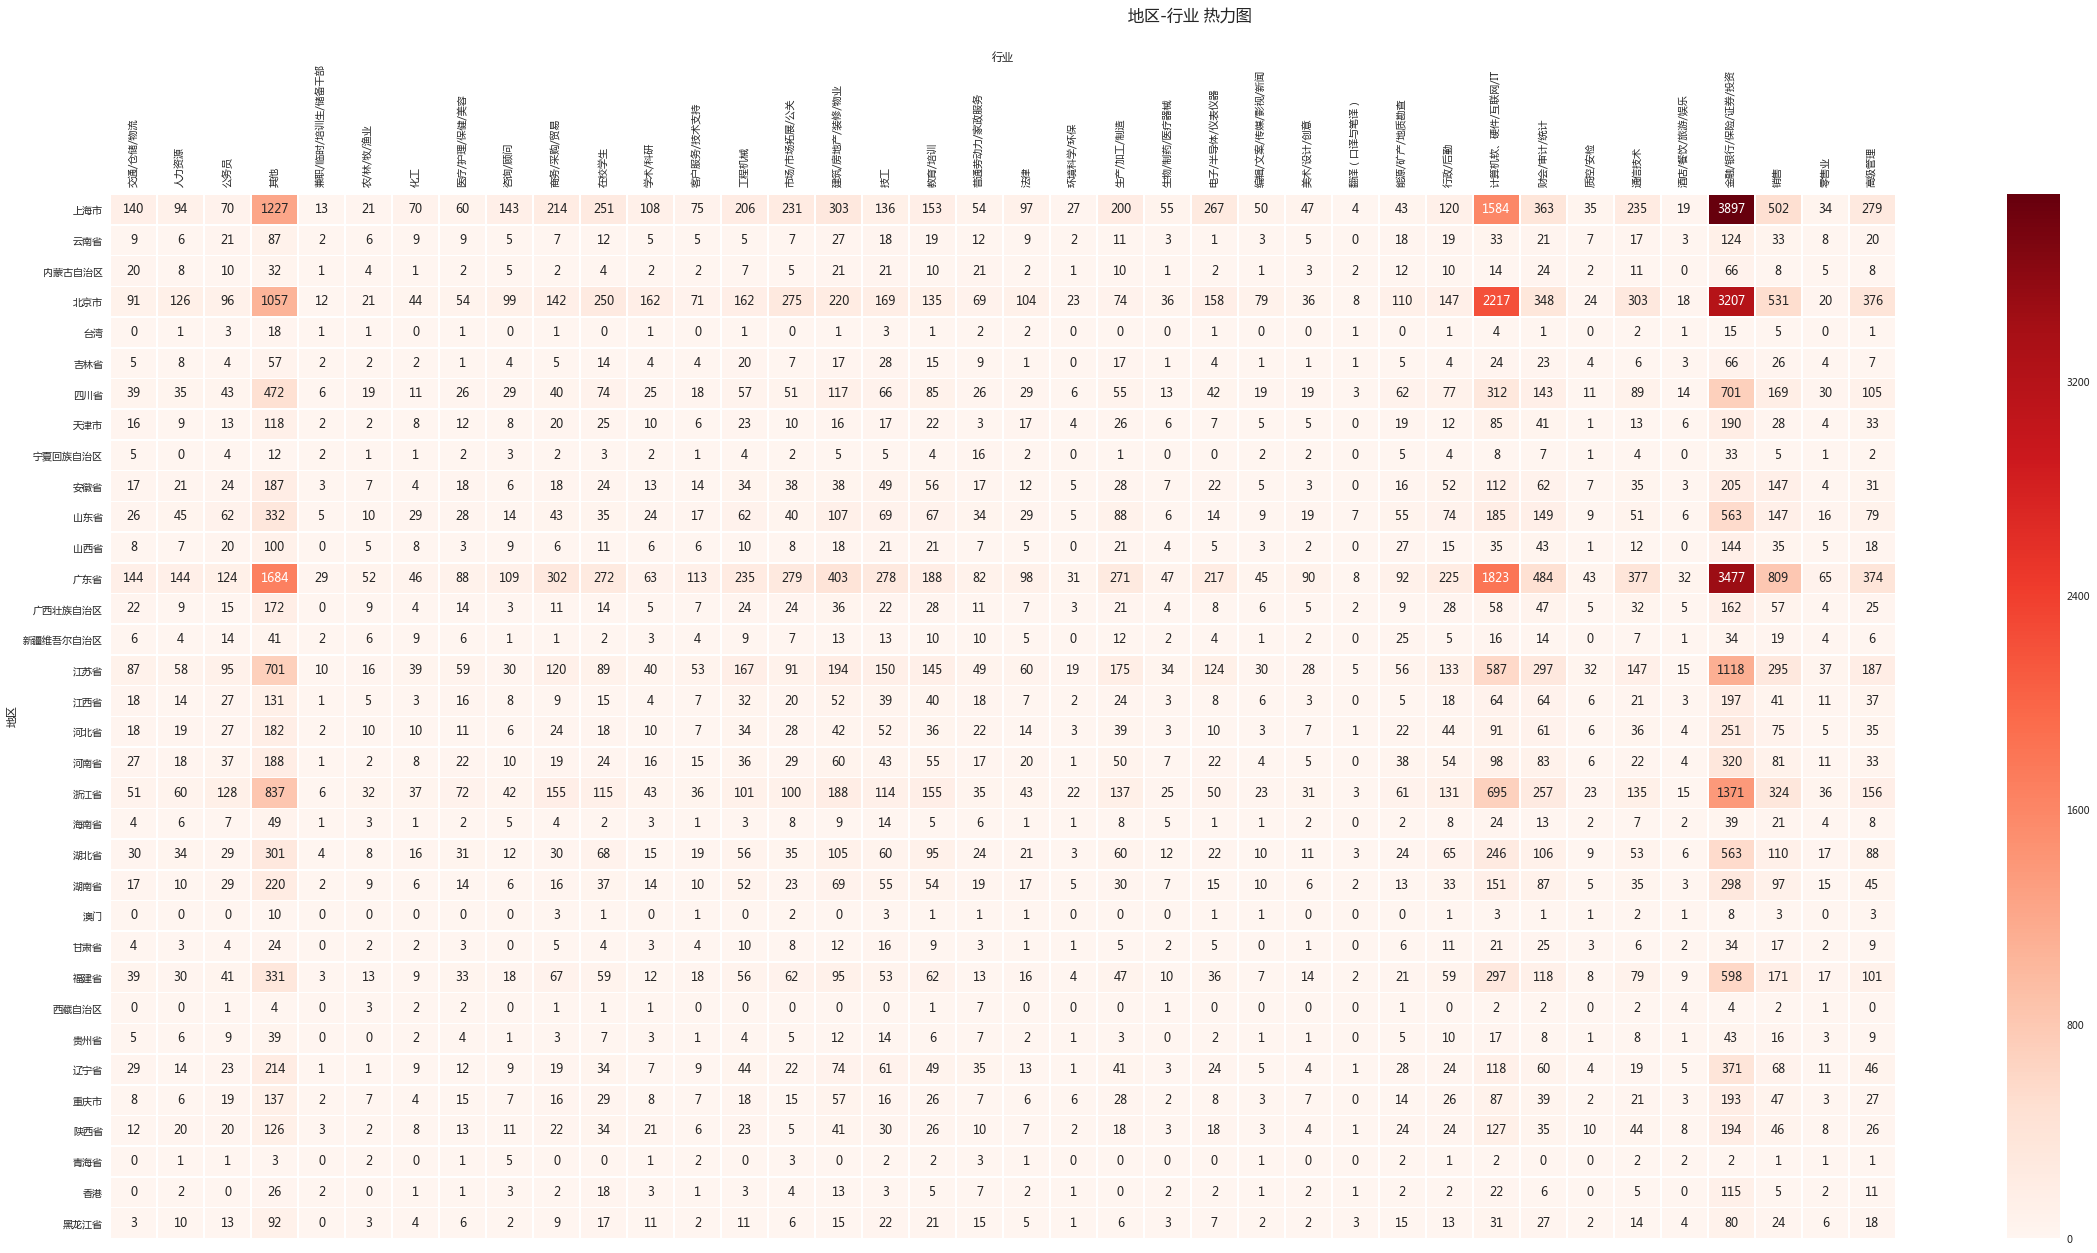

In [6]:
import seaborn as sns
sns.set(font="Microsoft YaHei")

f, ax = plt.subplots(figsize=(40, 20))

plt.subplots_adjust(top=0.85)
f.suptitle('地区-行业 热力图', fontsize=16)
sns.heatmap(locind.fillna(0), annot=True, cmap='Reds', fmt='.0f', linewidths=.5, ax=ax)

ax.set_xlabel('行业')
ax.xaxis.set_label_position('top')
ax.set_ylabel('地区')
ax.yaxis.set_label_position('left')

xticks = ['%s' % xt.get_text().strip('x-') for xt in ax.get_xticklabels()]
ax.set_xticklabels(xticks, rotation=90)
ax.xaxis.tick_top()

plt.show()

> 不过，画个图还真是费劲呐